# **Modelos con Pipelines**

In [2]:
import pandas as pd

In [3]:
fraude_train = pd.read_csv("fraude_train.csv") 

## **KNN**

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# === Crear pipeline con el mejor k encontrado (k=9) ===
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=9))
])


In [6]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separar variables
X = fraude_train.drop(columns=['isfraud'])
y = fraude_train['isfraud']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Balanceo SOLO en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

# === Entrenar pipeline ===
start_time = time.time()
pipe_knn.fit(X_train_bal, y_train_bal)

# Predecir sobre test (sin balancear)
y_pred = pipe_knn.predict(X_test)
y_proba = pipe_knn.predict_proba(X_test)
end_time = time.time()

print(f"Tiempo de cómputo (pipeline KNN): {end_time - start_time:.2f} segundos")

# === Reporte y métricas ===
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Tiempo de cómputo (pipeline KNN): 22.74 segundos

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     39871
         1.0       0.36      0.72      0.48      3395

    accuracy                           0.88     43266
   macro avg       0.66      0.81      0.70     43266
weighted avg       0.93      0.88      0.89     43266



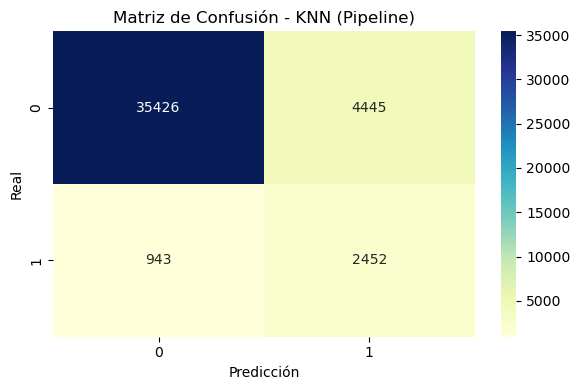

In [8]:

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matriz de Confusión - KNN (Pipeline)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


AUC final sobre test: 0.8671


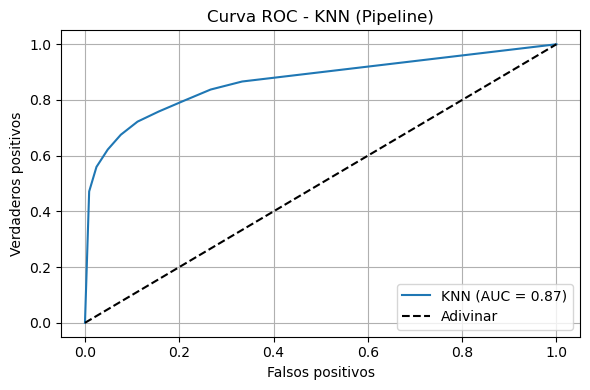

In [9]:

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
auc_score = roc_auc_score(y_test, y_proba[:, 1])
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - KNN (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **Bayes**